In [2]:
import cv2
import numpy as np
import scipy.fftpack as fp
from scipy import signal
from matplotlib import pyplot as plt

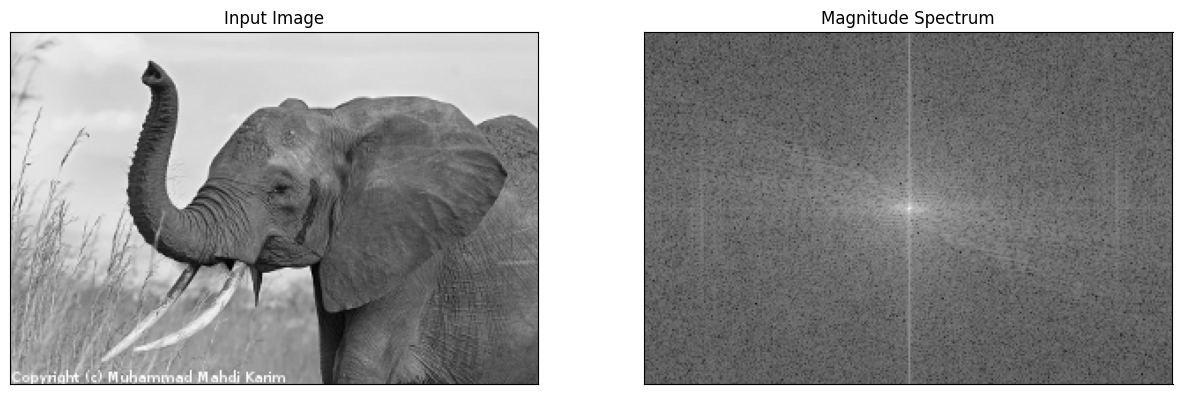

In [3]:
img = plt.imread('/home/santa/Desktop/lab/lab_6/elephant.png')

# Convert RGB image to GrayScale image 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Take Fourier at the input image
dft = cv2.dft(np.float32(img_gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft_spectrum = 20*np.log(0.01 + cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

## ============================= SHOW ============================ ##
plt.figure(figsize=(15,15))
# Show Fourier Spectrum of Input Image
plt.subplot(221)
plt.imshow( img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

# Show Fourier Spectrum of Input Image
plt.subplot(222)
plt.imshow( dft_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

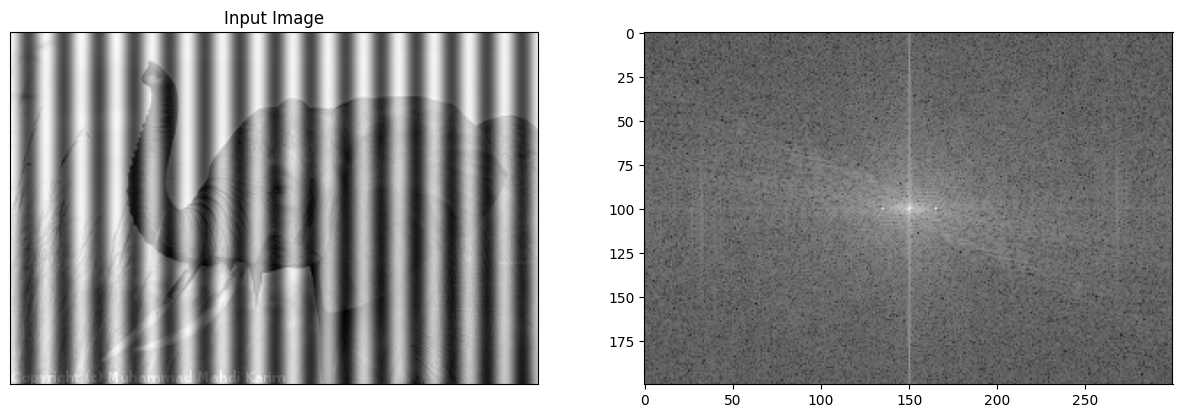

In [4]:

# add periodic noise to the image
for n in range(img_gray.shape[1]):
    img_gray[:, n] += np.cos(0.1*np.pi*n)
    
# Take Fourier at the input image
dft = cv2.dft(np.float32(img_gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft_spectrum = 20*np.log(0.01 + cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

## ============================= SHOW ============================ ##
plt.figure(figsize=(15,15))
# Show Fourier Spectrum of Input Image
plt.subplot(221)
plt.imshow( img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

# Show Fourier Spectrum of Input Image
plt.subplot(222)
plt.imshow( dft_spectrum, cmap='gray')
# plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
# plt.axis('on')
plt.show()

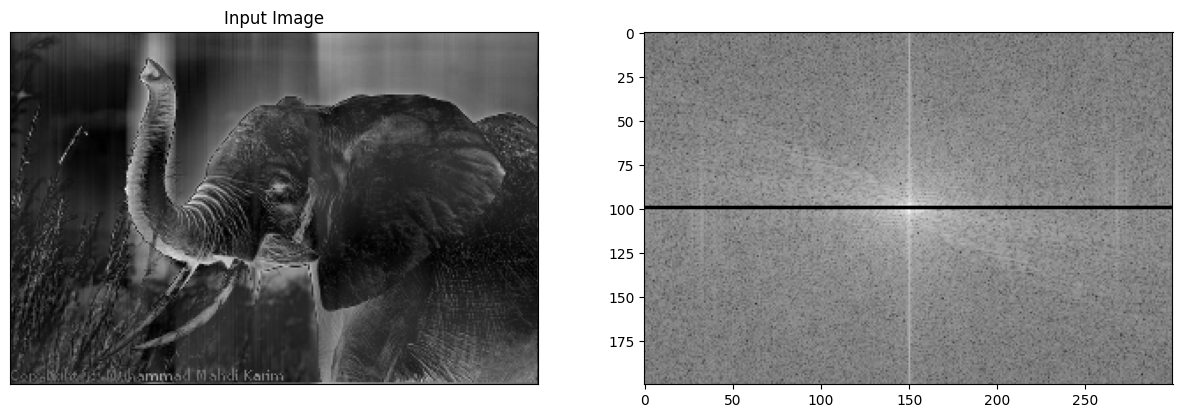

In [5]:
# eliminate the frequencies most likely responsible for noise (keep some low frequency components)
dft_Process = dft_shift.copy()
# dft_shift[99:101,:140] = dft_shift[99:101,160:] = 0 
dft_Process[99:101,:]  = 0 
dft_spectrum = 20*np.log(0.01 + cv2.magnitude(dft_Process[:,:,0],dft_Process[:,:,1]))

# Inverse DFT
img_back = cv2.idft(dft_Process)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

## ============================= SHOW ============================ ##
plt.figure(figsize=(15,15))
# Show Fourier Spectrum of Input Image
plt.subplot(221)
plt.imshow( np.rot90(np.rot90(img_back)), cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

# Show Fourier Spectrum of Input Image
plt.subplot(222)
plt.imshow( dft_spectrum, cmap='gray')
plt.show()

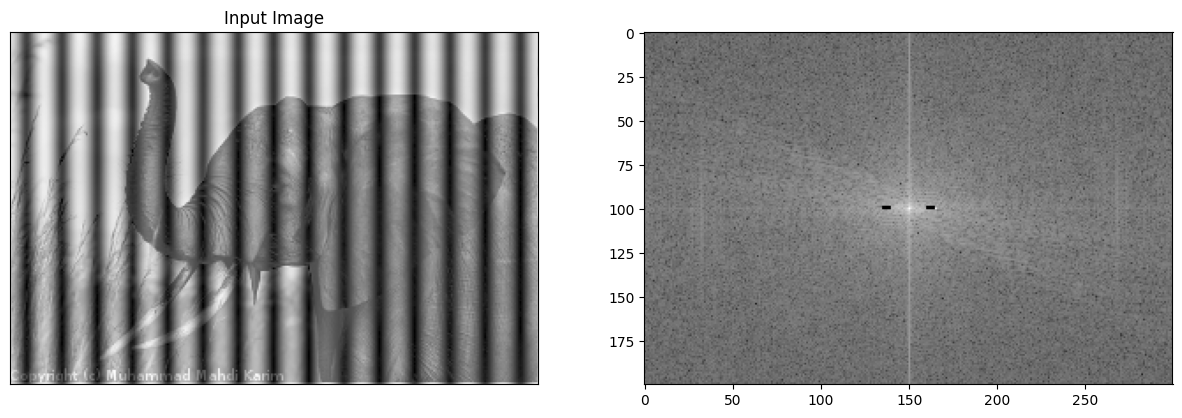

In [6]:
# eliminate the frequencies most likely responsible for noise (keep some low frequency components)
dft_Process = dft_shift.copy()
# dft_Process[99:101,:140] = dft_Process[99:101,160:] = 0 
dft_Process[99:101,135:140] = dft_Process[99:101,160:165] = 0 
# dft_Process[99:101,0:140] = dft_Process[99:101,160:] = 0 #:)
dft_spectrum = 20*np.log(0.01 + cv2.magnitude(dft_Process[:,:,0],dft_Process[:,:,1]))

# Inverse DFT
img_back = cv2.idft(dft_Process)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

## ============================= SHOW ============================ ##
plt.figure(figsize=(15,15))
# Show Fourier Spectrum of Input Image
plt.subplot(221)
plt.imshow( np.rot90(np.rot90(img_back)), cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

# Show Fourier Spectrum of Input Image
plt.subplot(222)
plt.imshow( dft_spectrum, cmap='gray')
plt.show()